In [2]:
import cv2
import pytesseract

In [8]:
image = cv2.imread('./cropped_objects/Info_3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sharpened = cv2.GaussianBlur(gray, (0, 0), 3)
sharpened = cv2.addWeighted(gray, 1.5, sharpened, -0.5, 0)
text = pytesseract.image_to_string(sharpened)
print(text)

3674 9808 3213



More enhance way to extract the text

In [12]:
# Step 1: Read the Image
image_path = "./cropped_objects/Info_3.jpg"
image = cv2.imread(image_path)

# Step 2: Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply GaussianBlur to Reduce Noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 4: Apply Thresholding
# You can experiment with different thresholding techniques
# Binary Thresholding
# _, binary_image = cv2.threshold(blurred, 150, 255, cv2.THRESH_OTSU)

# Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(blurred, 255, 
                                           cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                           cv2.THRESH_BINARY, 11, 2)

# Step 5: Sharpen the Image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
sharpened = cv2.morphologyEx(adaptive_threshold, cv2.MORPH_CLOSE, kernel)

# Step 6: Resize the Image
resized_image = cv2.resize(sharpened, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

custom_config = r'--oem 3 --psm 6'  # OCR Engine Mode 3, Page Segmentation Mode 6
extracted_text = pytesseract.image_to_string(resized_image, config=custom_config)

# Print the Extracted Text
print("Extracted Text:")
print(extracted_text)

Extracted Text:



In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import re

### Make prettier the prints ###
from colorama import Fore, Style
c_ = Fore.CYAN
m_ = Fore.MAGENTA
r_ = Fore.RED
b_ = Fore.BLUE
y_ = Fore.YELLOW
g_ = Fore.GREEN
w_ = Fore.WHITE

import warnings
warnings.filterwarnings(action='ignore') 

In [5]:
def ExtractDetails(image_path):
    text = pytesseract.image_to_string(Image.open(image_path), lang = 'eng')
    print(text)
    text = text.replace("\n", " ")
    text = text.replace("  ", " ")
    regex_DOB = re.compile('\d{2}[-/]\d{2}[-/]\d{4}')
    regex_num = re.compile('[A-Z]{5}[0-9]{4}[A-Z]{1}')
    
    image = cv2.imread(os.path.join(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")  
    
    if len(regex_num.findall(text)) == 0:
        print(f'{y_}Blurry Image for tesseract. Input new clear image for viewing pan card number !!!')
        print(Style.RESET_ALL)
    else:
        print("Pan Card Number : ", regex_num.findall(text)[0])
        
    print('=================================')
    
    if len(regex_DOB.findall(text)) == 0:
        print(f'{y_}Blurry Image for tesseract. Input new clear image for viewing DATE OF BIRTH !!!')
        print(Style.RESET_ALL)
    else:
        print("DATE OF BIRTH :   ", regex_DOB.findall(text)[0])
        
    print('=================================')

creer Feast
‘INCOME TAX DEPARTMENT
‘KUSUM LATA
HANI RAM

mmpongs2

Pec et

AgseLs7T2¢

we

HRA ARE
GOVT. OFINDIA


Blurry Image for tesseract. Input new clear image for viewing pan card number !!!

Blurry Image for tesseract. Input new clear image for viewing DATE OF BIRTH !!!



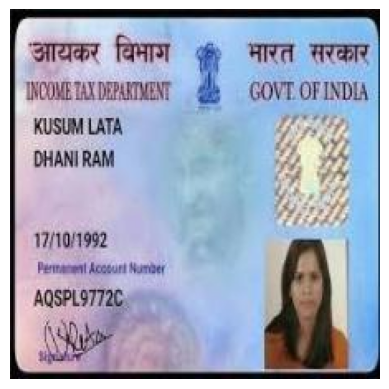

In [6]:
ExtractDetails('./PAN Model.v1i.yolov8/valid/images/32_skew_corrected_jpg.rf.10fc13ba8af033e71c77b911588a9f6c.jpg')